# Tour of Hammurabi X

In [2]:
# various imports

import sys
sys.path.append('/Users/tjtaylo2/Software/hammurabi_x/hamx/src/hampyx')

from pylab import cm
import healpy as hp
import numpy as np
import matplotlib
%matplotlib inline
from pylab import cm
cmap=cm.get_cmap('jet')
cmap.set_under('w')

import hampyx_class as hampyx
import params_class as par

In [3]:
# create a hampyx object using the template file 'defaults.xml' and put all the outputs into a directory "test.out"
# if no input custom parameter file is given, hamx will automatically look for a file named 'defaults.xml', and will
# return an error if nothing is found. 

# within the run directory, a copy of the input xml file will be put there called "params.xml", which will be where all
# further changes will be made.

hamx = hampyx.Hampy(custom_parameters='defaults.xml',working_directory='test.out',)

In [3]:
hamx.get_ele(['Grid','SunPosition','x'],opts='All') # see hampyx_class.py for notes on methods

Grid
|--> SunPosition {}
|--> Box_GMF {}
|--> Box_FE {}
|--> Box_CRE {}
|--> Shell {}
SunPosition
|--> x {'value': '-8.5'}
|--> y {'value': '0'}
|--> z {'value': '0'}
x


In [4]:
hamx.get_ele(['Fieldout'],opts='All')
hamx.mod_par([['Fieldout','breg_grid'],'write','0'])

Fieldout
|--> breg_grid {'read': '0', 'write': '0', 'filename': 'breg.bin'}
|--> brnd_grid {'read': '0', 'write': '0', 'filename': 'brnd.bin'}
|--> fereg_grid {'read': '0', 'write': '0', 'filename': 'ymw16.bin'}
|--> fernd_grid {'read': '0', 'write': '0', 'filename': 'fernd.bin'}
|--> cre_grid {'read': '0', 'write': '0', 'filename': 'cre.bin'}


In [5]:
hamx.get_ele(['MagneticField'])

MagneticField {}
|--> Regular {'cue': '1', 'type': 'Verify'}
|--> Random {'cue': '0', 'seed': '0', 'type': 'Local'}


In [5]:
hamx.call()
hamx.print_log()

.....................

main 10372.5 ms



In [7]:
hamx.call(keychain=[[['Fieldout','breg_grid'],'write','0'],[['CRE','Verify','alpha'],'value','3.0'],
                   [['Grid','Box_GMF','nx'],'value','512'],[['Grid','Box_GMF','ny'],'value','512'],
                   [['Grid','Box_GMF','nz'],'value','51'],
                    
                   [['Grid','Shell','nside_sim'],'value','128'], 
                   
                   [['Obsout','Sync'],'filename','./test.out/iqu_sync.fits'],
                   [['Obsout','Sync'],'freq','23'], 
                   [['Obsout','DM'],'filename','./test.out/dm.fits'],
                   [['Obsout','Faraday'],'filename','./test.out/fd.fits'],
                   
                   [['FreeElectron','Regular'],'type','Verify'], 
                   [['MagneticField','Regular'],'type','Jaffe']
                   ])

............................



0

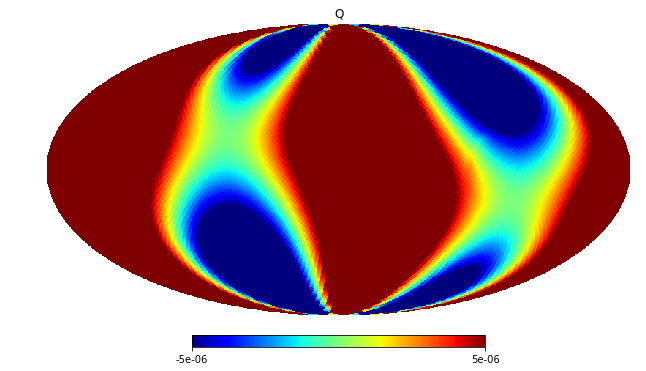

In [6]:
hamx_maps = hamx.get_obs()
hp.mollview(hamx_maps['Sync']['Q'],title = 'Q',min=-5e-6,max=5e-6,cmap=cmap)

What if you want to generate your own .xml file from some default? While this class has not been fully fleshed out, it does provide some framework for just modifying your own xml file (adding elements, etc.) which could be implemented in hampyx_class.py if desired.

In [18]:
my_params = par.Params()
my_params.read('test_params.xml')
my_params.get_ele(['Grid'])
my_params.add_ele([['Grid'],'Test',{"Test 1":'5',"Test 2":'3'}])
my_params.mod_par([['Grid','Test'],'Test 2','3.5'])
my_params.del_ele(['Grid','Test'])
my_params.write('output.xml')

Grid {}
|--> SunPosition {}
|--> Box_GMF {}
|--> Box_FE {}
|--> Box_CRE {}
|--> Shell {}


In [4]:
hamx.call(custom_parameter_file='test_params.xml')


No input at call
./test_params.xml
....................



0

In [ ]:
hamx.cleanup()